In [1]:
# https://drive.google.com/drive/folders/1TDAeYT30IDKgULs0UBxsv3YLaDnawOkg?usp=sharing

In [2]:
# 역전파(Backpropagation)
# https://sacko.tistory.com/19

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cols = ['pregnant','piasma', 'pressure','thickness','insuline','bmi','pedigree','age','class']
df = pd.read_csv('./Data/pima-indians-diabetes.csv', header=None, names = cols)
df.head()


,pregnant,piasma,pressure,thickness,insuline,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   piasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insuline   768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

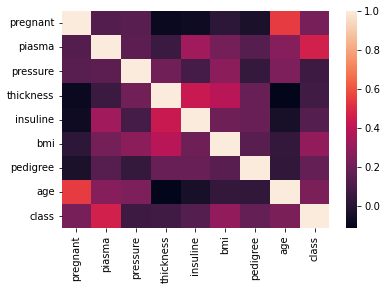

In [8]:
sns.heatmap(df.corr())

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [10]:
dataset = np.loadtxt('./Data/pima-indians-diabetes.csv', delimiter=',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [11]:
y = dataset[:, 8]
x = dataset[:, 0:8]

In [12]:
y.shape

(768,)

In [13]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))     # input layer
model.add(Dense(8, activation = 'relu'))                     # hidden layer
model.add(Dense(1)) # activation = 'sigmoid')                 # output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')   

# optimizer : gradientdescent 방식

# 손실함수(loss function) - 머신러닝 혹은 딥러닝 모델의 출력값과 사용자가 원하는 출력값의 오차를 의미
# https://cheris8.github.io/artificial%20intelligence/DL-Keras-Loss-Function/

In [20]:
model.fit(x, y, epochs=100, batch_size = 20)

# epochs : 전체 데이터를 몇 번 학습을 시킬 것인가
# batch_size : 한 번 학습 시 몇 개의 데이터를 학습시킬 것인가
# batch_size가 클 때 : 업데이트 하는데 메모리와 시간이 많이 소요 / 업데이트는 안정적
# batch_size가 작을 때 : 업데이트 하는데 메모리와 시간이 적게 소요 / 업데이트는 불안정적


# loss 와 accuracy가 늘지도 줄지도 않고있어 학습이 전혀 안되고 있다

Epoch 1/100
39/39 [==============================] - 0s 866us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 2/100
39/39 [==============================] - 0s 793us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 3/100
39/39 [==============================] - 0s 692us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 4/100
39/39 [==============================] - 0s 663us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 5/100
39/39 [==============================] - 0s 689us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 6/100
39/39 [==============================] - 0s 714us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 7/100
39/39 [==============================] - 0s 696us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 8/100
39/39 [==============================] - 0s 744us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 9/100
39/39 [==============================] - 0s 718us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 10/100
39/39 [==============================] - 0s 697us/step - loss: 5.4813 - accura

39/39 [==============================] - 0s 814us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 82/100
39/39 [==============================] - 0s 840us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 83/100
39/39 [==============================] - 0s 814us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 84/100
39/39 [==============================] - 0s 814us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 85/100
39/39 [==============================] - 0s 814us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 86/100
39/39 [==============================] - 0s 840us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 87/100
39/39 [==============================] - 0s 814us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 88/100
39/39 [==============================] - 0s 866us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 89/100
39/39 [==============================] - 0s 762us/step - loss: 5.4813 - accuracy: 0.6445
Epoch 90/100
39/39 [==============================] - 0s 840us/step - loss: 5.4813 - accuracy: 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.iloc[:, :8])

In [22]:
x_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [23]:
model.fit(x_scaled, y, epochs=100, batch_size = 20)

Epoch 1/100
39/39 [==============================] - 0s 787us/step - loss: 3.9388 - accuracy: 0.6732
Epoch 2/100
39/39 [==============================] - 0s 820us/step - loss: 1.9839 - accuracy: 0.7096
Epoch 3/100
39/39 [==============================] - 0s 814us/step - loss: 1.6532 - accuracy: 0.7266
Epoch 4/100
39/39 [==============================] - 0s 787us/step - loss: 1.0745 - accuracy: 0.7344
Epoch 5/100
39/39 [==============================] - 0s 787us/step - loss: 0.8255 - accuracy: 0.7513
Epoch 6/100
39/39 [==============================] - 0s 814us/step - loss: 0.7582 - accuracy: 0.7578
Epoch 7/100
39/39 [==============================] - 0s 796us/step - loss: 0.7355 - accuracy: 0.7565
Epoch 8/100
39/39 [==============================] - 0s 713us/step - loss: 0.7351 - accuracy: 0.7604
Epoch 9/100
39/39 [==============================] - 0s 752us/step - loss: 0.7049 - accuracy: 0.7630
Epoch 10/100
39/39 [==============================] - 0s 749us/step - loss: 0.6984 - accura

39/39 [==============================] - 0s 724us/step - loss: 0.4977 - accuracy: 0.7812
Epoch 82/100
39/39 [==============================] - 0s 713us/step - loss: 0.4961 - accuracy: 0.7799
Epoch 83/100
39/39 [==============================] - 0s 701us/step - loss: 0.4964 - accuracy: 0.7839
Epoch 84/100
39/39 [==============================] - 0s 681us/step - loss: 0.4958 - accuracy: 0.7799
Epoch 85/100
39/39 [==============================] - 0s 646us/step - loss: 0.4946 - accuracy: 0.7786
Epoch 86/100
39/39 [==============================] - 0s 705us/step - loss: 0.4946 - accuracy: 0.7799
Epoch 87/100
39/39 [==============================] - 0s 684us/step - loss: 0.4939 - accuracy: 0.7786
Epoch 88/100
39/39 [==============================] - 0s 698us/step - loss: 0.4930 - accuracy: 0.7812
Epoch 89/100
39/39 [==============================] - 0s 678us/step - loss: 0.4928 - accuracy: 0.7826
Epoch 90/100
39/39 [==============================] - 0s 689us/step - loss: 0.4920 - accuracy: 

In [24]:
model.evaluate(x_scaled, y)

24/24 [==============================] - 0s 607us/step - loss: 0.4839 - accuracy: 0.7839


[0.48389729857444763, 0.7838541865348816]